## DATA 245 Fall 2021 Project
Group 2: Canaan Law, Chitra Priyaa Sathya Moorthy, Haotong Qiu, Jie Dong, Lianglei Zhang, Rick Gosalvez

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import skimage
from skimage import transform
import cv2
import time

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from tqdm import tqdm

### Import Data

In [2]:
# endpoints (Canaan)
folder_benign_train = '../245 Project Testin/dataset1/train/benign'
folder_malignant_train = '../245 Project Testin/dataset1/train/malignant'

folder_benign_test = '../245 Project Testin/dataset1/test/benign'
folder_malignant_test = '../245 Project Testin/dataset1/test/malignant'

In [3]:
img_size = 200
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')


### Preprocess Images

In [4]:
img_size = (200, 200)

## Resize function
def _resize_image(image, target):
    image = cv2.resize(image, dsize=(target[0], target[1]), interpolation=cv2.INTER_LINEAR)
    image = cv2.GaussianBlur(image, (5,5),cv2.BORDER_DEFAULT)
    #image = cv2.blur(image, (50,50),cv2.BORDER_DEFAULT)
    return image


image = [_resize_image(image=i, target=img_size) for i in X_benign]
X_benign = np.stack(image, axis=0)


image = [_resize_image(image=i, target=img_size) for i in X_malignant]
X_malignant = np.stack(image, axis=0)

image = [_resize_image(image=i, target=img_size) for i in X_benign_test]
X_benign_test = np.stack(image, axis=0)

image = [_resize_image(image=i, target=img_size) for i in X_malignant_test]
X_malignant_test = np.stack(image, axis=0)

In [5]:
X_benign.shape

(1440, 200, 200, 3)

In [6]:
X_benign

array([[[[222, 175, 194],
         [222, 175, 196],
         [222, 176, 197],
         ...,
         [212, 156, 157],
         [211, 156, 156],
         [211, 155, 155]],

        [[222, 175, 195],
         [222, 175, 196],
         [223, 176, 197],
         ...,
         [212, 156, 157],
         [211, 156, 156],
         [211, 156, 155]],

        [[222, 175, 194],
         [222, 175, 195],
         [222, 175, 195],
         ...,
         [212, 157, 158],
         [212, 156, 157],
         [211, 156, 156]],

        ...,

        [[199, 152, 157],
         [199, 152, 156],
         [198, 151, 154],
         ...,
         [198, 146, 147],
         [198, 145, 146],
         [197, 145, 145]],

        [[199, 151, 156],
         [198, 151, 155],
         [198, 150, 153],
         ...,
         [199, 146, 148],
         [198, 145, 146],
         [197, 145, 145]],

        [[198, 151, 156],
         [198, 151, 155],
         [197, 150, 153],
         ...,
         [199, 146, 149],
        

### Split into Train and Test

In [7]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

### Explore Data

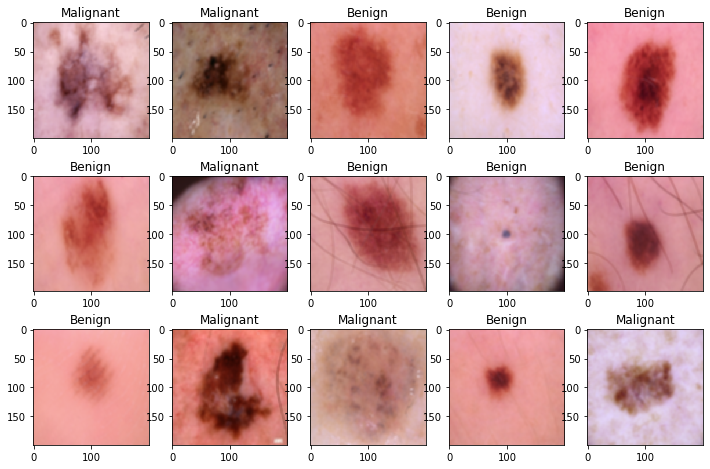

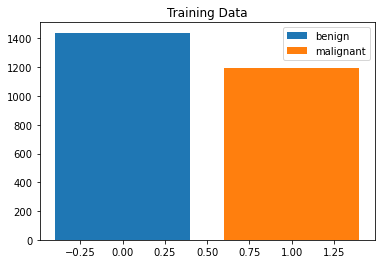

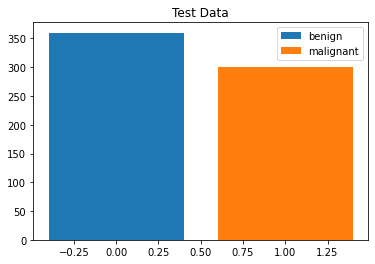

In [8]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()


plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()


X_train = X_train/255.
X_test = X_test/255.

### SVM

In [9]:
# support vector machine classifier
#This is only a simple demostration if we apply any models on the training dataset
from sklearn.svm import SVC
start_SVC = time.time()
model = SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
stop_SVC = time.time()
train_time_SVC = stop_SVC - start_SVC

from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))
svm = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {svm:.3f}')
print()
print(classification_report(y_test, y_pred))
print(f"Training time: {stop_SVC - start_SVC}s")

Accuracy Score: 0.833

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       360
         1.0       0.79      0.86      0.82       300

    accuracy                           0.83       660
   macro avg       0.83      0.84      0.83       660
weighted avg       0.84      0.83      0.83       660

Training time: 115.39820313453674s


### KNN

In [10]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3) 
start_KNN = time.time()
knn_model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
stop_KNN = time.time()
train_time_KNN = stop_KNN - start_KNN

from sklearn.metrics import accuracy_score
y_pred = knn_model.predict(X_test.reshape(X_test.shape[0],-1))
knn = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {knn:.3f}')
print(f"Training time: {stop_KNN - start_KNN}s")

Accuracy Score: 0.768
Training time: 0.4162027835845947s


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning')

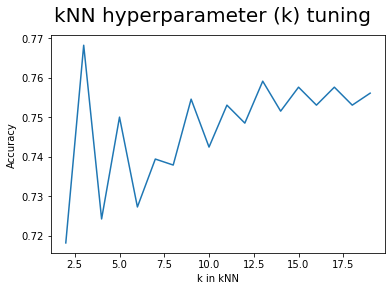

In [11]:
## tune best k 
accus = []
ks = list(range(2,20))
for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
    y_pred = knn_model.predict(X_test.reshape(X_test.shape[0],-1))
    accus.append(accuracy_score(y_test, y_pred))
fig = plt.figure()
plt.plot(ks, accus)
plt.xlabel('k in kNN')
plt.ylabel('Accuracy')
fig.suptitle('kNN hyperparameter (k) tuning', fontsize=20)

### Import Metrics Libraries

In [12]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

### Confusion Matrix

In [13]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index  =['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],315,45
True[1],116,184


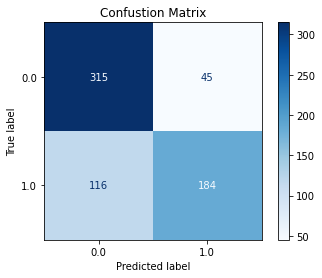

In [14]:
plot_confusion_matrix(knn_model, X_test.reshape(X_test.shape[0],-1), y_test, cmap=plt.cm.Blues)
plt.title('Confustion Matrix')
plt.show()

### ROC Curve

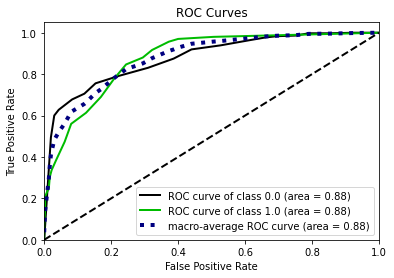

In [15]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, knn_model.predict_proba(X_test.reshape(X_test.shape[0],-1)), plot_micro=False)
plt.show()

In [16]:
target_names = ['benign', 'malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.73      0.88      0.80       360
   malignant       0.80      0.61      0.70       300

    accuracy                           0.76       660
   macro avg       0.77      0.74      0.75       660
weighted avg       0.76      0.76      0.75       660



### Decision Tree / Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)

start_RF = time.time()
forest.fit(X_train.reshape(X_train.shape[0],-1), y_train)
stop_RF = time.time()
train_time_RF = stop_RF - start_RF

y_pred_rf = forest.predict(X_test.reshape(X_test.shape[0],-1))
rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy on the test set:{:.3f}'.format(rf))
print(f"Training time: {stop_RF - start_RF}s")

Accuracy on the test set:0.826
Training time: 34.96750283241272s


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
start_DT = time.time()
dt.fit(X_train.reshape(X_train.shape[0],-1), y_train)
stop_DT = time.time()
train_time_DT = stop_DT - start_DT

y_pred_dt = dt.predict(X_test.reshape(X_test.shape[0],-1))
tree = accuracy_score(y_test, y_pred_dt)
print('Accuracy on the test set:{:.3f}'.format(tree))
print(f"Training time: {stop_DT - start_DT}s")

Accuracy on the test set:0.771
Training time: 175.1195034980774s


### Side-by-Side

In [19]:
# manual import of CNN value (see Data245ProjCNN.ipynb)
cnn = 0.870

In [20]:
print(f'SVM Accuracy :            {svm:.3f}')
print(f'KNN Accuracy :            {knn:.3f}')
print(f'Decision Tree Accuracy :  {tree:.3f}')
print(f'Random Forest Accuracy :  {rf:.3f}')
print(f'CNN (19 epoch) Accuracy : {cnn:.3f}')

SVM Accuracy :            0.833
KNN Accuracy :            0.768
Decision Tree Accuracy :  0.771
Random Forest Accuracy :  0.826
CNN (19 epoch) Accuracy : 0.870


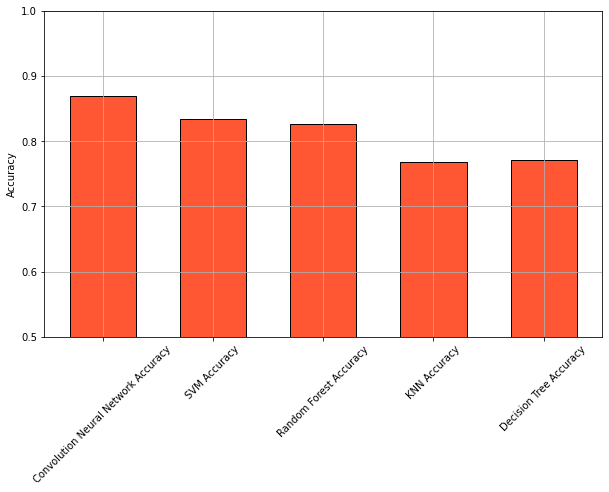

In [21]:
accuracy = [cnn, svm, rf, knn, tree]
acc_name = ["Convolution Neural Network Accuracy", "SVM Accuracy", 
            "Random Forest Accuracy", "KNN Accuracy", "Decision Tree Accuracy"]
f, ax = plt.subplots(figsize=(10,6))
ax = plt.bar(acc_name, accuracy, width=0.6, color="#FF5733", edgecolor="black")
plt.grid(True)
plt.axis(ymin=0.5, ymax=1)
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel("Accuracy")
plt.show()

### Training Time

In [22]:
print(f'SVM Accuracy :            {train_time_SVC:.3f}')
print(f'KNN Accuracy :            {train_time_KNN:.3f}')
print(f'Decision Tree Accuracy :  {train_time_DT:.3f}')
print(f'Random Forest Accuracy :  {train_time_RF:.3f}')

SVM Accuracy :            115.398
KNN Accuracy :            0.416
Decision Tree Accuracy :  175.120
Random Forest Accuracy :  34.968


### Save ML Models

In [24]:
# Import pickle Package
import pickle

In [25]:
# Save the Modle to file in the current working directory
Pkl_Filename_SVM = "Pickle_SVM_Model.pkl"  # model (SVM)

with open(Pkl_Filename_SVM, 'wb') as file:  
    pickle.dump(model, file)

In [26]:
# knn_model (KNN)
Pkl_Filename_KNN = "Pickle_KNN_Model.pkl"  

with open(Pkl_Filename_KNN, 'wb') as file:  
    pickle.dump(knn_model, file)

In [27]:
# forest (Random Forest)
Pkl_Filename_RF = "Pickle_FOREST_Model.pkl"  

with open(Pkl_Filename_RF, 'wb') as file:  
    pickle.dump(forest, file)

In [28]:
# dt (Decision Tree)
Pkl_Filename_DT = "Pickle_TREE_Model.pkl"  

with open(Pkl_Filename_DT, 'wb') as file:  
    pickle.dump(dt, file)

### Check pickle file on a model

In [29]:
# Load the Model back from file
with open(Pkl_Filename_SVM, 'rb') as file:  
    Pickled_SVM_Model = pickle.load(file)

Pickled_SVM_Model

SVC()

In [30]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_SVM_Model.score(X_test.reshape(X_test.shape[0],-1), y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

Test score: 83.18 %


In [31]:
# Predict the Labels using the reloaded Model
Ypredict = Pickled_SVM_Model.predict(X_test.reshape(X_test.shape[0],-1))  

Ypredict

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0.